## Author: Nurudeen Abdulsalaam


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import catboost
import pytz
%matplotlib inline
import warnings
from ast import increment_lineno
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
samplesubmission = pd.read_csv("SampleSubmission.csv")

In [3]:
train

,ID,Datetime,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity,Offset_fault
0,ID_QF0ZTQJ2SF5Q,2021-11-03 04:06:31,52.58,49.52,17.4,96.0,0.0
1,ID_4GTK689CNX5S,2021-11-08 18:43:23,35.25,33.40,25.0,75.0,0.0
2,ID_DL7VVKW9U7XQ,2021-11-07 09:50:33,19.18,23.50,24.9,75.0,0.0
3,ID_6XQOMBXM2DG3,2022-01-01 18:55:15,19.40,15.48,24.9,70.0,0.0
4,ID_UQZW9ISJY9QE,2021-11-05 22:23:48,38.30,34.77,20.9,89.0,0.0
...,...,...,...,...,...,...,...
158886,ID_GWWC857I6MQ6,2021-12-31 19:13:50,56.88,51.08,19.3,98.0,0.0
158887,ID_W88D76RI7YQ4,2021-11-28 15:21:01,35.90,35.93,26.4,69.0,0.0
158888,ID_4QNL02A8141D,2022-01-05 06:39:50,127.28,155.90,17.0,89.0,0.0
158889,ID_Q5CO70TL6CN9,2021-10-27 20:59:15,40.62,31.27,23.4,75.0,1.0


In [4]:
df = pd.read_csv("train.csv")
df.drop(columns = ["ID"], inplace = True)
df = df.set_index("Datetime")
df

,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity,Offset_fault
Datetime,,,,,
2021-11-03 04:06:31,52.58,49.52,17.4,96.0,0.0
2021-11-08 18:43:23,35.25,33.40,25.0,75.0,0.0
2021-11-07 09:50:33,19.18,23.50,24.9,75.0,0.0
2022-01-01 18:55:15,19.40,15.48,24.9,70.0,0.0
2021-11-05 22:23:48,38.30,34.77,20.9,89.0,0.0
...,...,...,...,...,...
2021-12-31 19:13:50,56.88,51.08,19.3,98.0,0.0
2021-11-28 15:21:01,35.90,35.93,26.4,69.0,0.0
2022-01-05 06:39:50,127.28,155.90,17.0,89.0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 158891 entries, 2021-11-03 04:06:31 to nan
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Sensor1_PM2.5      156951 non-null  float64
 1   Sensor2_PM2.5      156951 non-null  float64
 2   Temperature        156999 non-null  float64
 3   Relative_Humidity  156999 non-null  float64
 4   Offset_fault       158890 non-null  float64
dtypes: float64(5)
memory usage: 7.3+ MB


In [6]:
train.head()

,ID,Datetime,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity,Offset_fault
0,ID_QF0ZTQJ2SF5Q,2021-11-03 04:06:31,52.58,49.52,17.4,96.0,0.0
1,ID_4GTK689CNX5S,2021-11-08 18:43:23,35.25,33.40,25.0,75.0,0.0
2,ID_DL7VVKW9U7XQ,2021-11-07 09:50:33,19.18,23.50,24.9,75.0,0.0
3,ID_6XQOMBXM2DG3,2022-01-01 18:55:15,19.40,15.48,24.9,70.0,0.0
4,ID_UQZW9ISJY9QE,2021-11-05 22:23:48,38.30,34.77,20.9,89.0,0.0


In [7]:
test.head()

,ID,Datetime,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity
0,ID_STL3V9B2OU12,2022-01-28 08:49:41,90.75,114.78,22.2,56.0
1,ID_U2EKAY4SGA94,2022-02-16 21:30:17,56.03,52.18,NaN,NaN
2,ID_UJFLEWQR0U4N,2022-01-24 17:57:18,387.35,346.73,28.1,63.0
3,ID_S2C2GPGA4R5I,2022-01-31 07:07:09,63.17,83.85,21.6,82.0
4,ID_5V2C2ZL221H8,2022-01-31 00:37:05,69.23,53.07,22.7,80.0


In [8]:
samplesubmission.head()

,ID,Offset_fault
0,ID_STL3V9B2OU12,0
1,ID_U2EKAY4SGA94,0
2,ID_UJFLEWQR0U4N,0
3,ID_S2C2GPGA4R5I,0
4,ID_5V2C2ZL221H8,0


In [9]:
train.shape, test.shape, samplesubmission.sample

((158891, 7),
 (127361, 6),
 <bound method NDFrame.sample of                      ID  Offset_fault
 0       ID_STL3V9B2OU12             0
 1       ID_U2EKAY4SGA94             0
 2       ID_UJFLEWQR0U4N             0
 3       ID_S2C2GPGA4R5I             0
 4       ID_5V2C2ZL221H8             0
 ...                 ...           ...
 127356  ID_HNCS9Q2GNCQB             0
 127357  ID_GIIQYTE11L3H             0
 127358  ID_EC7F1P4GXKCL             0
 127359  ID_J64RVG2BRAG0             0
 127360  ID_7ABZNHCIVVAV             0
 
 [127361 rows x 2 columns]>)

In [10]:
train.describe()

,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity,Offset_fault
count,156951.000000,156951.000000,156999.000000,156999.000000,158890.000000
mean,40.751429,38.190074,23.319624,78.650444,0.370193
std,28.504431,28.621406,3.835276,14.765466,0.482858
min,-2.780000,-1.990000,16.700000,27.000000,0.000000
25%,22.430000,19.500000,20.400000,68.000000,0.000000
50%,36.500000,33.770000,21.900000,84.000000,0.000000
75%,49.420000,47.580000,26.300000,91.000000,1.000000
max,962.350000,961.650000,34.900000,99.000000,1.000000


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127361 entries, 0 to 127360
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ID                 127361 non-null  object 
 1   Datetime           127361 non-null  object 
 2   Sensor1_PM2.5      127361 non-null  float64
 3   Sensor2_PM2.5      127361 non-null  float64
 4   Temperature        39271 non-null   float64
 5   Relative_Humidity  39271 non-null   float64
dtypes: float64(4), object(2)
memory usage: 5.8+ MB


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158891 entries, 0 to 158890
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ID                 158891 non-null  object 
 1   Datetime           158890 non-null  object 
 2   Sensor1_PM2.5      156951 non-null  float64
 3   Sensor2_PM2.5      156951 non-null  float64
 4   Temperature        156999 non-null  float64
 5   Relative_Humidity  156999 non-null  float64
 6   Offset_fault       158890 non-null  float64
dtypes: float64(5), object(2)
memory usage: 8.5+ MB


In [13]:
train.isnull().sum()

ID                      0
Datetime                1
Sensor1_PM2.5        1940
Sensor2_PM2.5        1940
Temperature          1892
Relative_Humidity    1892
Offset_fault            1
dtype: int64

In [14]:
train = train.fillna(0)
train.isnull().sum()

ID                   0
Datetime             0
Sensor1_PM2.5        0
Sensor2_PM2.5        0
Temperature          0
Relative_Humidity    0
Offset_fault         0
dtype: int64

In [15]:
test = test.fillna(0)
test.isnull().sum()

ID                   0
Datetime             0
Sensor1_PM2.5        0
Sensor2_PM2.5        0
Temperature          0
Relative_Humidity    0
dtype: int64

In [16]:
train.duplicated().sum()

0

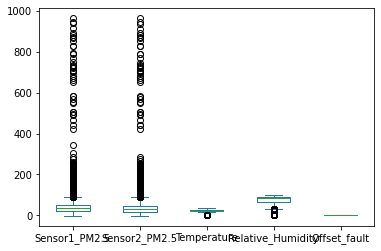

In [17]:
#fig, ax = plt.subplots(nrows = 2, ncol = 2, figsize = (15,10))
train.plot(kind = "box");

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
dataframe = train
array = dataframe.values

# separate array into input and output components
X = array[:,2:-1]
Y = array[:,-1]
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)


In [20]:
train.columns

Index(['ID', 'Datetime', 'Sensor1_PM2.5', 'Sensor2_PM2.5', 'Temperature',
       'Relative_Humidity', 'Offset_fault'],
      dtype='object')

In [21]:
trained = pd.DataFrame(rescaledX, columns = ['Sensor1_PM2.5', 'Sensor2_PM2.5', 'Temperature',
       'Relative_Humidity'])

In [22]:
trained

,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity
0,0.057360,0.053454,0.498567,0.969697
1,0.039404,0.036725,0.716332,0.757576
2,0.022753,0.026452,0.713467,0.757576
3,0.022981,0.018129,0.713467,0.707071
4,0.042564,0.038147,0.598854,0.898990
...,...,...,...,...
158886,0.061816,0.055072,0.553009,0.989899
158887,0.040078,0.039351,0.756447,0.696970
158888,0.134759,0.163847,0.487106,0.898990
158889,0.044968,0.034515,0.670487,0.757576


In [23]:
train2 = train.drop(columns = ['Sensor1_PM2.5', 'Sensor2_PM2.5', 'Temperature',
       'Relative_Humidity', 'Offset_fault'])
train2

,ID,Datetime
0,ID_QF0ZTQJ2SF5Q,2021-11-03 04:06:31
1,ID_4GTK689CNX5S,2021-11-08 18:43:23
2,ID_DL7VVKW9U7XQ,2021-11-07 09:50:33
3,ID_6XQOMBXM2DG3,2022-01-01 18:55:15
4,ID_UQZW9ISJY9QE,2021-11-05 22:23:48
...,...,...
158886,ID_GWWC857I6MQ6,2021-12-31 19:13:50
158887,ID_W88D76RI7YQ4,2021-11-28 15:21:01
158888,ID_4QNL02A8141D,2022-01-05 06:39:50
158889,ID_Q5CO70TL6CN9,2021-10-27 20:59:15


In [24]:
train2[['Sensor1_PM2.5', 'Sensor2_PM2.5', 'Temperature','Relative_Humidity']] = trained[['Sensor1_PM2.5', 'Sensor2_PM2.5', 'Temperature','Relative_Humidity']]
train2["Offset_fault"] = train["Offset_fault"]

In [25]:
train2

,ID,Datetime,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity,Offset_fault
0,ID_QF0ZTQJ2SF5Q,2021-11-03 04:06:31,0.057360,0.053454,0.498567,0.969697,0.0
1,ID_4GTK689CNX5S,2021-11-08 18:43:23,0.039404,0.036725,0.716332,0.757576,0.0
2,ID_DL7VVKW9U7XQ,2021-11-07 09:50:33,0.022753,0.026452,0.713467,0.757576,0.0
3,ID_6XQOMBXM2DG3,2022-01-01 18:55:15,0.022981,0.018129,0.713467,0.707071,0.0
4,ID_UQZW9ISJY9QE,2021-11-05 22:23:48,0.042564,0.038147,0.598854,0.898990,0.0
...,...,...,...,...,...,...,...
158886,ID_GWWC857I6MQ6,2021-12-31 19:13:50,0.061816,0.055072,0.553009,0.989899,0.0
158887,ID_W88D76RI7YQ4,2021-11-28 15:21:01,0.040078,0.039351,0.756447,0.696970,0.0
158888,ID_4QNL02A8141D,2022-01-05 06:39:50,0.134759,0.163847,0.487106,0.898990,0.0
158889,ID_Q5CO70TL6CN9,2021-10-27 20:59:15,0.044968,0.034515,0.670487,0.757576,1.0


In [26]:
train2.describe()

,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity,Offset_fault
count,158891.000000,158891.000000,158891.000000,158891.000000,158891.000000
mean,0.044589,0.041212,0.660228,0.784989,0.370191
std,0.029717,0.029839,0.131095,0.171481,0.482857
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.025489,0.021761,0.581662,0.676768,0.000000
50%,0.040388,0.036798,0.627507,0.838384,0.000000
75%,0.053889,0.051274,0.753582,0.919192,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


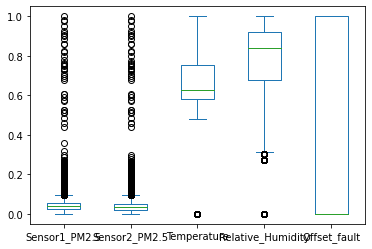

In [27]:
train2.plot(kind = "box")

In [28]:
low, high = train2["Sensor1_PM2.5"].quantile([0.1,0.8])
train2 = train2[train2["Sensor1_PM2.5"].between(low, high)]

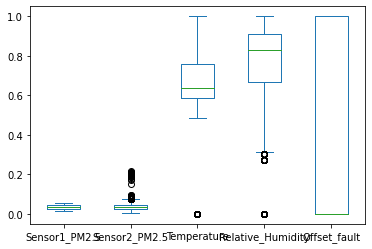

In [29]:
train2.plot(kind = "box");

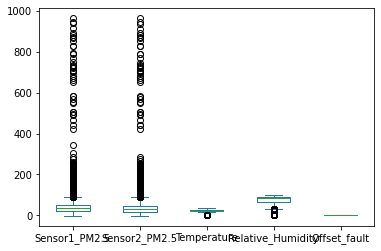

In [30]:
train.plot(kind = "box");

In [31]:
train2['Datetime']= pd.to_datetime(train2['Datetime'])
train2["day"] = train2.Datetime.dt.day
train2["week"] = train2.Datetime.dt.week
train2["month"] = train2.Datetime.dt.month
train2["year"] = train2.Datetime.dt.year
train2["hour"] = train2.Datetime.dt.hour

In [32]:
train2.head()

,ID,Datetime,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity,Offset_fault,day,week,month,year,hour
0,ID_QF0ZTQJ2SF5Q,2021-11-03 04:06:31,0.057360,0.053454,0.498567,0.969697,0.0,3,44,11,2021,4
1,ID_4GTK689CNX5S,2021-11-08 18:43:23,0.039404,0.036725,0.716332,0.757576,0.0,8,45,11,2021,18
2,ID_DL7VVKW9U7XQ,2021-11-07 09:50:33,0.022753,0.026452,0.713467,0.757576,0.0,7,44,11,2021,9
3,ID_6XQOMBXM2DG3,2022-01-01 18:55:15,0.022981,0.018129,0.713467,0.707071,0.0,1,52,1,2022,18
4,ID_UQZW9ISJY9QE,2021-11-05 22:23:48,0.042564,0.038147,0.598854,0.898990,0.0,5,44,11,2021,22


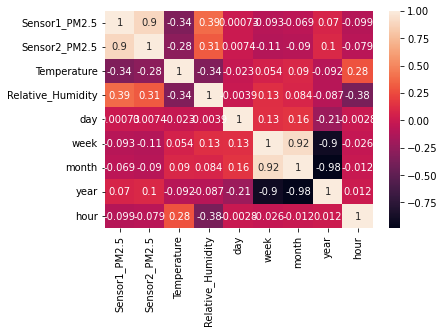

In [33]:
corr = train2.select_dtypes("number").drop(columns = ["Offset_fault"]).corr()
sns.heatmap(corr, annot = True);

In [34]:
#train2.drop(columns = ["Sensor1_PM2.5"], inplace = True)

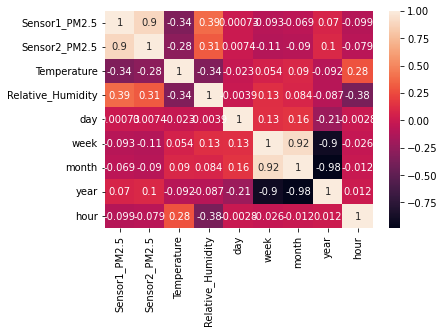

In [35]:
corr = train2.select_dtypes("number").drop(columns = ["Offset_fault"]).corr()
sns.heatmap(corr, annot = True);

In [36]:
to_train = train2[['Sensor1_PM2.5','Sensor2_PM2.5', 'Temperature', 'Relative_Humidity', 'day', 'week', 'month', 'year', 'hour']]
X = to_train.fillna(0)
y = train2["Offset_fault"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

RF_model = RandomForestClassifier(max_depth = 3, random_state = 0)
RF_model.fit(X_train, y_train)

RF_pred = RF_model.predict(X_test)

print(f'Accuracy score: {accuracy_score(y_test, RF_pred)}')
print('\n')
print(f'{classification_report(y_test, RF_pred)}')

Accuracy score: 0.7735238608789431


              precision    recall  f1-score   support

         0.0       0.78      0.89      0.83     13619
         1.0       0.77      0.59      0.67      8635

    accuracy                           0.77     22254
   macro avg       0.77      0.74      0.75     22254
weighted avg       0.77      0.77      0.77     22254



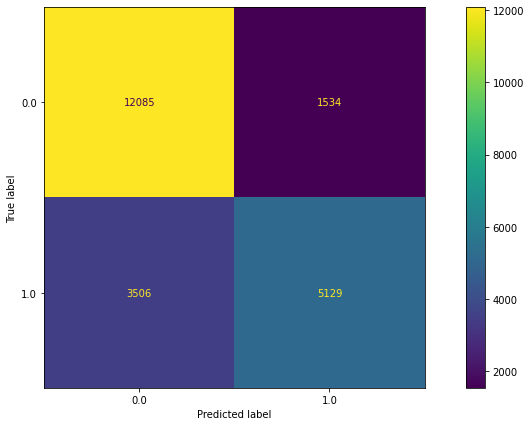

In [37]:
cm = confusion_matrix(y_test, RF_pred, labels = RF_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels= RF_model.classes_)
fig, ax = plt.subplots(figsize = (15, 7))
disp.plot(ax= ax)
plt.show()

In [38]:
test['Datetime']= pd.to_datetime(test['Datetime'])
test["day"] = test.Datetime.dt.day
test["week"] = test.Datetime.dt.week
test["month"] = test.Datetime.dt.month
test["year"] = test.Datetime.dt.year
test["hour"] = test.Datetime.dt.hour

Text(0.5, 1.0, 'prediction Data Distribution')

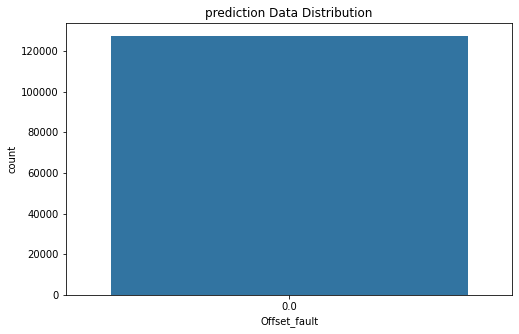

In [39]:
to_test = test[['Sensor1_PM2.5','Sensor2_PM2.5', 'Temperature', 'Relative_Humidity', 'week', 'day', 'month', 'year', 'hour']]
test_df = to_test.fillna(0)
predictions = RF_model.predict(test_df)

sub_file = samplesubmission.copy()
sub_file.Offset_fault = predictions

plt.figure(figsize= (8, 5))
sns.countplot(sub_file.Offset_fault)
plt.title("prediction Data Distribution")

In [40]:
sub_file.to_csv('RF_model.csv', index = False)

## Let's use another model

In [42]:
!pip install catboost
from catboost import CatBoostRegressor
from catboost import Pool
from sklearn.metrics import mean_squared_error, r2_score
import math

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.3 MB/s 


In [ ]:
train_data = Pool(data=X_train, label=y_train)
test_data = Pool(data=X_test, label=y_test)
cat_model = CatBoostRegressor() 

cat_model.fit( X_train, y_train, eval_set=(X_test, y_test), plot=True)

Cat_pred = cat_model.predict(X_test)

print(f'Accuracy score: {accuracy_score(y_test, Cat_pred)}')
print('\n')
print(f'{classification_report(y_test, Cat_pred)}')

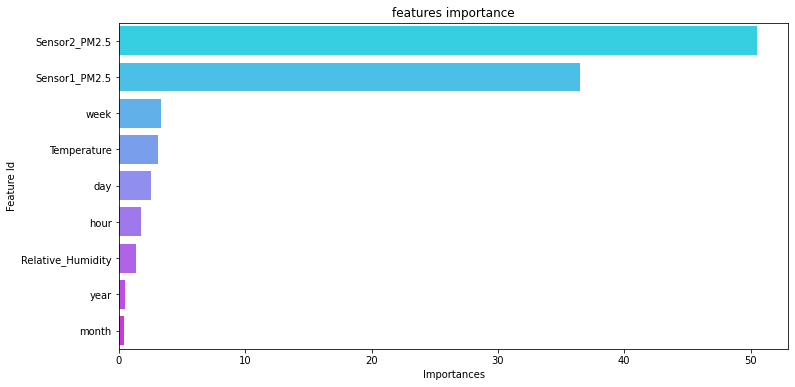

In [44]:
df_feature_importance = pd.DataFrame(cat_model.get_feature_importance(prettified=True))
plt.figure(figsize=(12, 6));
feature_plot= sns.barplot(x="Importances", y="Feature Id", data=df_feature_importance,palette="cool");
plt.title('features importance');

Text(0.5, 1.0, 'prediction Data Distribution')

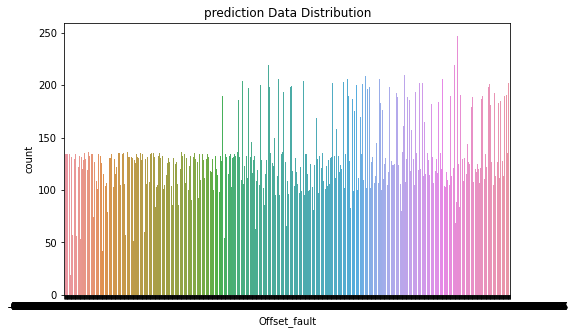

In [45]:
to_test = test[['Sensor1_PM2.5','Sensor2_PM2.5', 'Temperature', 'Relative_Humidity', 'week', 'day', 'month', 'year', 'hour']]
test_df = to_test.fillna(0)
predictions = cat_model.predict(test_df)

sub_file = samplesubmission.copy()
sub_file.Offset_fault = predictions

plt.figure(figsize= (8, 5))
sns.countplot(sub_file.Offset_fault)
plt.title("prediction Data Distribution")

In [46]:
y_predict= cat_model.predict(X_test)
Rmse_test = math.sqrt(mean_squared_error(y_test,y_predict))
r2_test = r2_score(y_test,y_predict)

n= X_train.shape[0] 
p= X_train.shape[1] 
adj_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)

print("Evaluation on test data")
print("RMSE: {:.2f}".format(Rmse_test))
print("R2: {:.2f}".format(r2_test))
print("Adjusted R2: {:.2f}".format(adj_r2_test))

Evaluation on test data
RMSE: 0.20
R2: 0.84
Adjusted R2: 0.84


In [50]:
sub_file.to_csv('Cat_model.csv', index = False)

Performance has been improved from 77% to 84%